In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

import mlgrad.funcs as funcs

from mlgrad.af import averaging_function
import mlgrad.cluster as cluster

In [2]:
import matplotlib as mpl

In [3]:
mpl.rcParams['figure.autolayout'] = True
#mpl.rcParams

In [4]:
df = pd.read_csv("data/starsCYG.csv", sep=',', index_col="id")
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [5]:
X = np.ascontiguousarray(df.values, dtype="d")

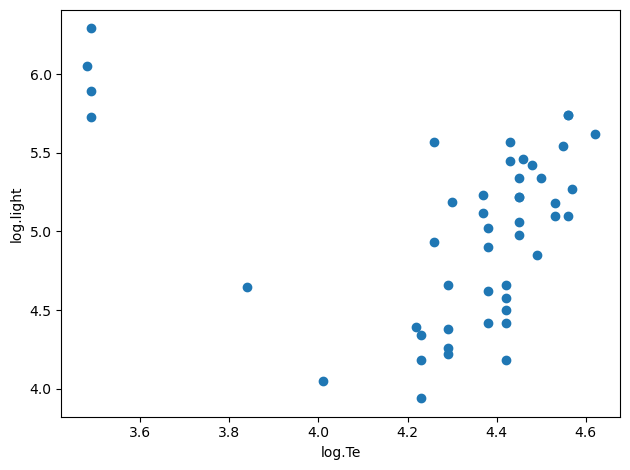

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("log.Te")
plt.ylabel("log.light")
plt.show()

In [7]:
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
x_min = min(x1_min, x2_min)
x_max = max(x1_max, x2_max)
extent = (x_min, x_max, x_min, x_max)
xrange1 = np.linspace(x_min, x_max, 100)
xrange2 = np.linspace(x_min, x_max, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]

In [16]:
avrfunc = averaging_function("WM", 
                             rhofunc=funcs.QuantileFunc(0.86, funcs.SoftAbs_Sqrt(0.001)))
hcd = cluster.RKMeansMahalanobis(2, avrfunc)

In [17]:
hcd.fit(X)

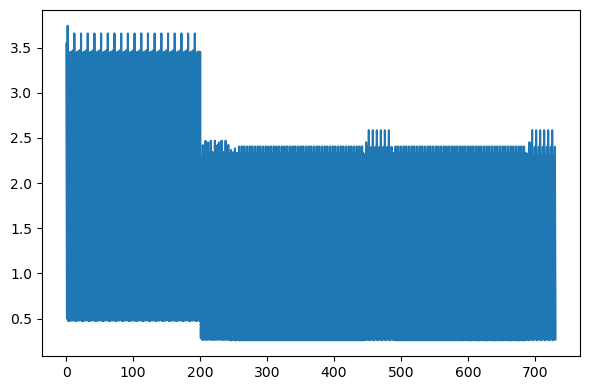

In [25]:
plt.figure(figsize=(6,4))
plt.plot(hcd.qvals)
plt.show()

In [19]:
D = hcd.eval_dists(XX)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

0.00011614855530821896 27.54047269282069


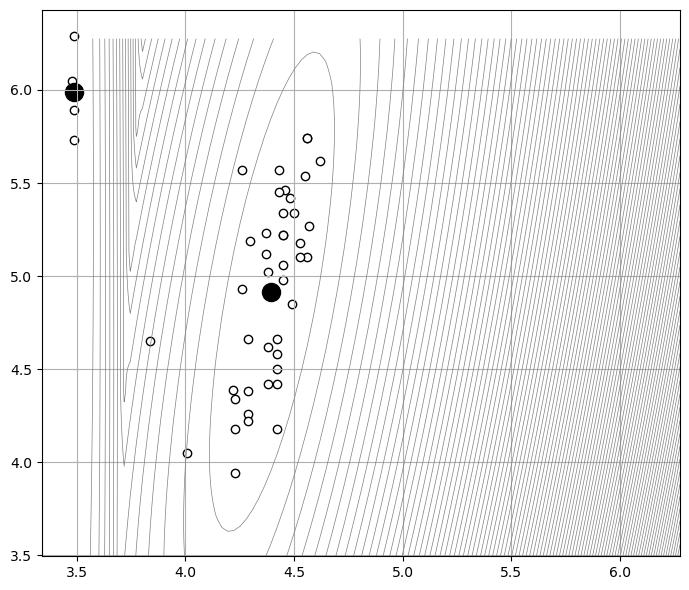

In [20]:
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=36, linewidths=1.0)
plt.contour(DD, origin='lower', extent=extent, 
            levels=np.linspace(0.0,D.max(),100), colors='grey', linewidths=0.5)
plt.scatter(hcd.c[:,0], hcd.c[:,1], c='k', edgecolors='k', s=169)
plt.grid(1)
plt.show()

### Среднее арифметическое

In [ ]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, avgmin, 2, 
                                    tol=1.0e-6)

In [ ]:
km.fit(X)

In [ ]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.plot(km.dvals)
# plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

In [ ]:
D2 = km.evaluate_dist(XX)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())

In [ ]:
plt.figure(figsize=(7,6))
plt.contour(DD2, origin='lower', extent=extent, 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=36, linewidth=1.0)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=169)
plt.grid(1)
plt.show()

In [ ]:
plt.figure(figsize=(14,6.5))

plt.subplot(1,2,1)
plt.title('Robust algorithm')
plt.contour(DD, origin='lower', extent=extent, 
            levels=np.linspace(0.,D.max(),50), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=64)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=100)

plt.subplot(1,2,2)
plt.title('Regular algorithm')
plt.contour(DD2, origin='lower', extent=extent, 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=64)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=100)
plt.savefig('fig/robust_kmeans_center_variance_s4.eps')
plt.tight_layout()
plt.show()

In [23]:
N = len(X)
print((N-6)/N, N)

0.8723404255319149 47
